## **Пример выполнения практической работы №2**

1. Подгружаем нужные пакеты для работы с визуализацией и данными (версия Matplotlib должен быть  выше 3.4.Х)

In [1]:
# установка matplotlib
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 54.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import math

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import FormatStrFormatter

2. Загружаем данные. 
В качестве примера используются смоделированные данные, которые отражают функционирование упрощенной системы водоснабжения. Данные содеражат как нормальные периоды функционирования системы, так и аномальные. 
Задача: понять, каким образом меняется поведение системы в результате выполнения атаки.

In [2]:
df = pd.read_csv('/content/0_1_Attack_DataSet.csv')
df.info() # посмотрим сколько признаков, есть ли пропущенные, а также их тип, распознан ли он правильно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_record_inc           7200 non-null   int64  
 1   watLevel_R1_3_bool      7200 non-null   int64  
 2   watLevel_R1_2_bool      7200 non-null   int64  
 3   watLevel_R1_1_bool      7200 non-null   int64  
 4   Fullness_R1_persent     7200 non-null   float64
 5   Crane_state_persent     7200 non-null   float64
 6   Flow_state_persent      7200 non-null   float64
 7   watLevel_R2_3_bool      7200 non-null   int64  
 8   watLevel_R2_2_bool      7200 non-null   int64  
 9   watLevel_R2_1_bool      7200 non-null   int64  
 10  Fullness_R2_persent     7200 non-null   float64
 11  Pump_state_bool         7200 non-null   int64  
 12  PumpFlow_state_persent  7200 non-null   float64
 13  Time_sec                7200 non-null   float64
 14  isAttack                7200 non-null   

3. Очевидно, что id_record_inc - это идентификатор записи, а признаки isAttack и classAttack - признаки-метки, которые говорят о норме или не норме, 7 признаков - булевых (это переменные типа int64), и 5 вещественных (float 64). 
Почему переменные типа int64 булевы, на самом деле понятно дальше.


In [3]:
df.describe() 

id_record_inc  watLevel_R1_3_bool  watLevel_R1_2_bool  \
count    7200.000000         7200.000000         7200.000000   
mean     3600.500000            0.176806            0.162083   
std      2078.605302            0.381531            0.368553   
min         1.000000            0.000000            0.000000   
25%      1800.750000            0.000000            0.000000   
50%      3600.500000            0.000000            0.000000   
75%      5400.250000            0.000000            0.000000   
max      7200.000000            1.000000            1.000000   

       watLevel_R1_1_bool  Fullness_R1_persent  Crane_state_persent  \
count         7200.000000          7200.000000          7200.000000   
mean             0.172917            10.679284             0.112861   
std              0.378201             8.459536             0.251422   
min              0.000000             4.315000             0.000000   
25%              0.000000             6.835000             0.000000   
50%              0.000000             9.463500             0.000000   
75%              0.000000            12.380000             0.000000   
max              1.000000            99.340000             1.000000   

       Flow_state_persent  watLevel_R2_3_bool  watLevel_R2_2_bool  \
count         7200.000000         7200.000000         7200.000000   
mean             0.112653            0.803611            0.832500   
std              0.250261            0.397294            0.373448   
min              0.000000            0.000000            0.000000   
25%              0.000000            1.000000            1.000000   
50%              0.000000            1.000000            1.000000   
75%              0.000000            1.000000            1.000000   
max              0.999000            1.000000            1.000000   

       watLevel_R2_1_bool  Fullness_R2_persent  Pump_state_bool  \
count         7200.000000          7200.000000      7200.000000   
mean             0.832222            89.320716         0.960833   
std              0.373695             8.459536         0.194005   
min              0.000000             0.660000         0.000000   
25%              1.000000            87.620000         1.000000   
50%              1.000000            90.536500         1.000000   
75%              1.000000            93.165000         1.000000   
max              1.000000            95.685000         1.000000   

       PumpFlow_state_persent     Time_sec     isAttack  classAttack  
count             7200.000000  7200.000000  7200.000000  7200.000000  
mean                 0.863804  1800.250000     0.416667     0.416667  
std                  0.183424  1039.302651     0.493041     0.493041  
min                  0.000000     0.500000     0.000000     0.000000  
25%                  0.842000   900.375000     0.000000     0.000000  
50%                  0.893000  1800.250000     0.000000     0.000000  
75%                  0.947000  2700.125000     1.000000     1.000000  
max                  1.000000  3600.000000     1.000000     1.000000

## Анализ числовых (вещественных) параметров

5. Давайте сравним эффективность визуализации распределения данных с помощью ящика с усами и с помощью гистограммы на примере 5 вещественных признаков. 
При первом приближении, 5 вещественных признаков имеют разный диапазон, скорее всего дроби означают доли, соответственно, их нужно привести в единый формат. Далее распределение этих параметров интересно посмотреть в контексте значений целевой функции, т.е. посмотреть сколько значений признак принимает на норме и ненорме. 


In [4]:
labels = ['Crane_state_persent', 'Flow_state_persent','PumpFlow_state_persent']

# подправим диапазон процентов
# !!! датафрейм пандаса может сохранять значения между запусками ячейки, поэтому 
# !!! если запускать ячейку более 1 раза, то колонки могут умножаться и далее
for col in labels:
  df[col] = df[col] * 100

df.describe() 

id_record_inc  watLevel_R1_3_bool  watLevel_R1_2_bool  \
count    7200.000000         7200.000000         7200.000000   
mean     3600.500000            0.176806            0.162083   
std      2078.605302            0.381531            0.368553   
min         1.000000            0.000000            0.000000   
25%      1800.750000            0.000000            0.000000   
50%      3600.500000            0.000000            0.000000   
75%      5400.250000            0.000000            0.000000   
max      7200.000000            1.000000            1.000000   

       watLevel_R1_1_bool  Fullness_R1_persent  Crane_state_persent  \
count         7200.000000          7200.000000          7200.000000   
mean             0.172917            10.679284            11.286111   
std              0.378201             8.459536            25.142159   
min              0.000000             4.315000             0.000000   
25%              0.000000             6.835000             0.000000   
50%              0.000000             9.463500             0.000000   
75%              0.000000            12.380000             0.000000   
max              1.000000            99.340000           100.000000   

       Flow_state_persent  watLevel_R2_3_bool  watLevel_R2_2_bool  \
count         7200.000000         7200.000000         7200.000000   
mean            11.265319            0.803611            0.832500   
std             25.026101            0.397294            0.373448   
min              0.000000            0.000000            0.000000   
25%              0.000000            1.000000            1.000000   
50%              0.000000            1.000000            1.000000   
75%              0.000000            1.000000            1.000000   
max             99.900000            1.000000            1.000000   

       watLevel_R2_1_bool  Fullness_R2_persent  Pump_state_bool  \
count         7200.000000          7200.000000      7200.000000   
mean             0.832222            89.320716         0.960833   
std              0.373695             8.459536         0.194005   
min              0.000000             0.660000         0.000000   
25%              1.000000            87.620000         1.000000   
50%              1.000000            90.536500         1.000000   
75%              1.000000            93.165000         1.000000   
max              1.000000            95.685000         1.000000   

       PumpFlow_state_persent     Time_sec     isAttack  classAttack  
count             7200.000000  7200.000000  7200.000000  7200.000000  
mean                86.380431  1800.250000     0.416667     0.416667  
std                 18.342435  1039.302651     0.493041     0.493041  
min                  0.000000     0.500000     0.000000     0.000000  
25%                 84.200000   900.375000     0.000000     0.000000  
50%                 89.300000  1800.250000     0.000000     0.000000  
75%                 94.700000  2700.125000     1.000000     1.000000  
max                100.000000  3600.000000     1.000000     1.000000

In [5]:
# определим функции для построения множества гистограмм с одинаковыми настройками
def hist_for_atribute_set(df, labels, ax, bin_num=25, df2=pd.DataFrame(), 
                          ylim=None, ylabel=None, y_scale='linear'):
      
  for i, col in enumerate(labels):
    ax[i].set_yscale(y_scale)   
    ax[i].tick_params(labelsize=10)
    ax[i].set_xlabel(col)
    
    # уберем лишние границы графика
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].grid()

    ax[i].hist(df[col], bin_num, density=False, color='#377eb8', alpha=.75) # синий 
    if (not df2.empty):
      ax[i].hist(df2[col], bin_num, density=False, color='#e41a1c', alpha=.45) # красный '#e41a1c' 

  # если графиков меньше чем есть в сетке, убираем лишние оси
  len_labels = len(labels)
  len_ax = len(ax)
  if len_labels < len_ax:
    for ax in ax[len_labels : len_labels + (len_ax - len_labels)]:
      ax.axis('off')

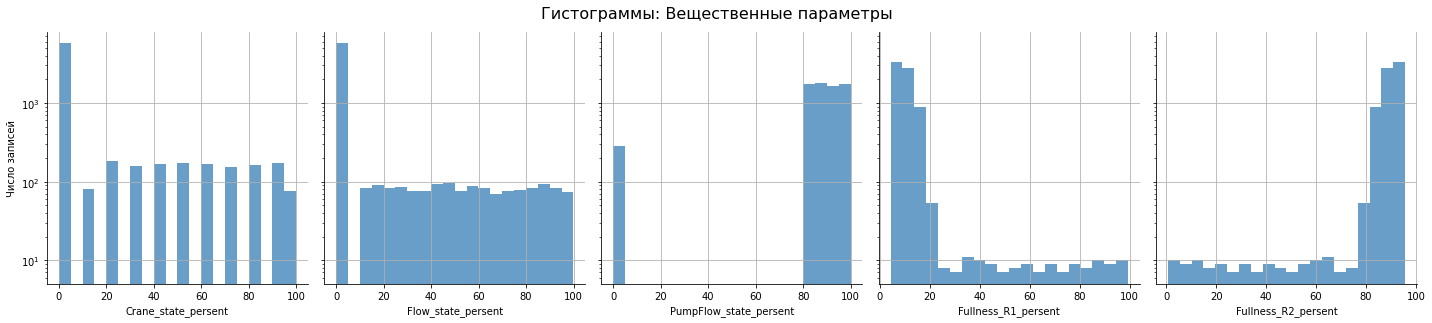

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(20, 5))

# поэкспериментируйте с масштабом оси Y, параметр y_scale ('linear, 'symlog', 'log')
labels += ['Fullness_R1_persent', 'Fullness_R2_persent'] 
hist_for_atribute_set(df, labels, ax, bin_num=20, y_scale='log') 

ax[0].set_ylabel('Число записей')
plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
fig.tight_layout(rect=[0, .03, 1, .95])

Обратите внимание, как меняются гистограммы в зависимости от числа 'корзинок' (попробуйте установить параметр bin_num в 5, 10, 50, 100).Полученные графики достаточно легко трактовать.  Также поэкспериментируйте с типом шкалы - линейная , логарифмическая и 'symlog' (это шкала, в которой задается диапазон в значений в котором график линейный, а значения выходящие из диапазона трасформируются по логарифмической школае)
Видно, что параметр Crane_state_persent в основном имеет значения близкие к 0, но есть небольшое число записей, которые имеют значения больше 10, причем наблюдается четкая закономерность в значениях: они принимают значения кратные 1. 

Похожую картину можно наблюдать для параметра Flow_state_persent, хотя там нет какой либо явной закономерности изменения параметра. Очевидный выброс есть у параметра PumpFlow_state_persent(значение 0). 

А вот каких либо характерных изменений в параметра Fullness_R1_persent и Fullness_R2_persent не наблюдается. 
На основе этих выводов определим наи дальнейшие шаги:


1.   Сравним, можно ли сделать такие выводы использую boxplot (ящик с усами)
2.   Посмотрим на то, как распределены значения в зависимости меток атак (заметьте это сложно сделать с помощью boxplot).
3.    Посмотрим, как меняются эти значения этих параметров во 
времени, т.е. построим обычные timelines.

In [7]:
# аналогичным образом можно определить функцию для построения множества ящиков с усами.
def boxplot_for_atribute_set(df, labels, ax, ylim=None, ylabel=None):
  flierprops = dict(marker='o', markersize=3)
  
  for i, col in enumerate(labels):
    ax.boxplot(df[col], positions=[i + 1], flierprops=flierprops) # i + 1
    ax.tick_params(labelsize=10)
    ax.set_xticks(np.arange(len(labels)) + 1, labels)
            
    if ylim:
      ax.set_ylim(ylim)

    if ylabel:
      ax.set_ylabel(ylabel)

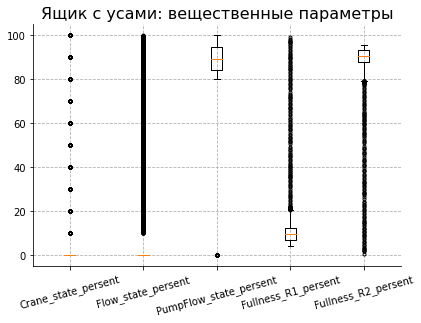

In [8]:
fig, ax = plt.subplots(sharey=True, figsize=(17, 5))
fig.set_figwidth(6)
plt.xticks(rotation=15)
boxplot_for_atribute_set(df, labels, ax)
ax.set_title('Ящик с усами: вещественные параметры', fontsize=16)

# уберем лишние границы графика
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# добавили немного больше координатной сетке, 
# чтобы более точно определить диапазоны значений
minor_ticks = np.arange(0, 101, 5)

ax.grid(linestyle='--' )
fig.tight_layout(rect=[0, .03, 1, .95])

Трактовать 'ящики' с усами проще после выполненного анализа данных с помощью гистограмм. В принципе также легко увидеть, что для параметров Crane_state_persent, Flow_state_persent были правильно определен характер изменения. Также очевиден выброс в параметра PumpFlow_State_persent. И наверное стал немного больше понятен характер изменений параметров Fullness_R1_persent  и Fullness_R2_persent: большая часть значений лежит достаточно узком диапазоне значений (около 15 и около 90). Кстати графики в этом случае можно было сделать не на одной диаграмме, а на нескольких, главеное , сохранив общий диапазон значений.  


Оценим распределение значений параметров с учетом значений целевого признака classAttack. Давайте для начала построим столбчатую диаграмму для этого признака, чтобы понять какова доля аномальных значений.

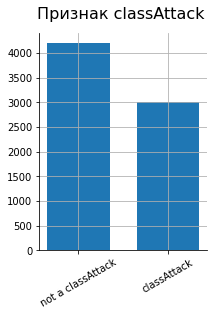

In [9]:
class_values = df['classAttack'].unique()

# тут упростила себе жизнь, т.к. знала, что всего два класса
df_norm = df[(df['classAttack']==class_values[0])]
df_anorm = df[(df['classAttack']==class_values[1])]

fig, ax = plt.subplots()
fig.set_figwidth(3)
plt.xticks(rotation=30)
plt.suptitle('Признак classAttack', fontsize=16, y=.97)
ax.bar(['not a classAttack', 'classAttack'], [df_norm.shape[0], df_anorm.shape[0]], width = .7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid()
plt.show()

На удивление набор данных сбалансирован. Теперь оценим распределение значение с учетом значения целевой функции. В принципе для этого можно строить для интересующего нас параметра 2 гистограммы рядом, но мы 'наложим' их друг на друга.

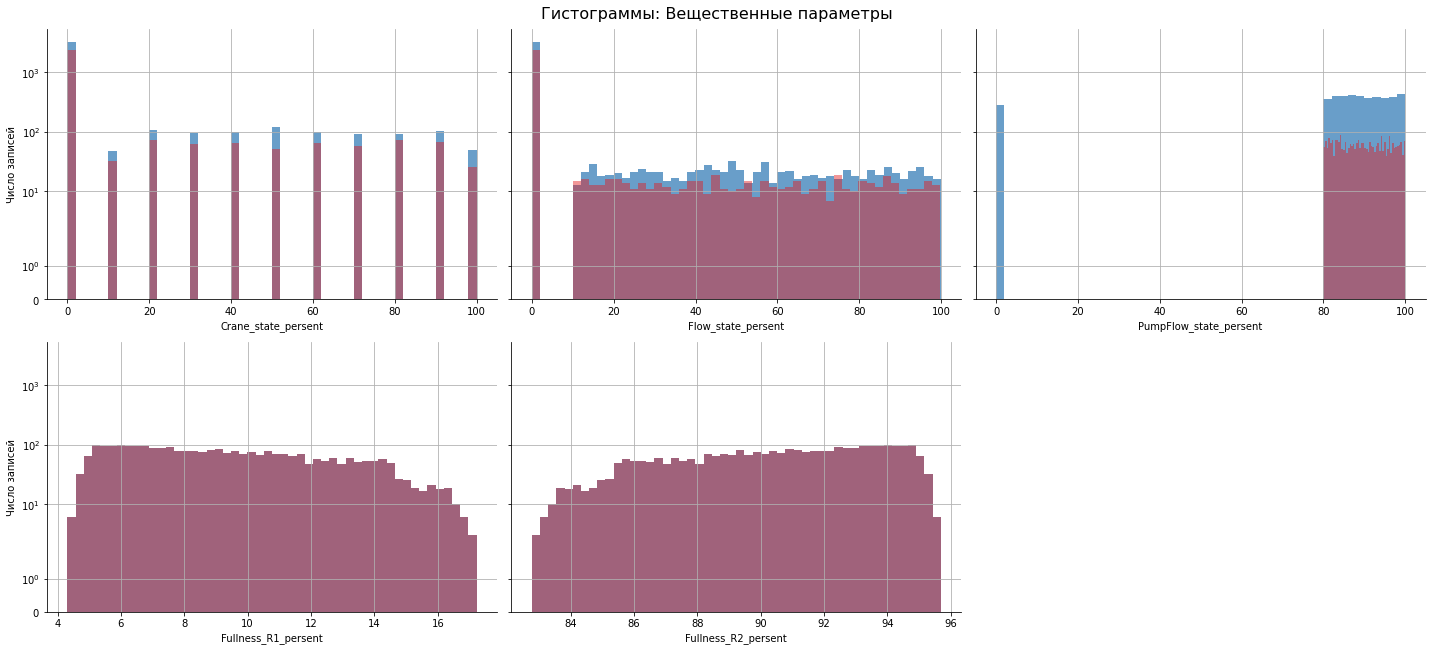

In [10]:
labels1 = ['Crane_state_persent', 'Flow_state_persent','PumpFlow_state_persent']
labels2 = ['Fullness_R1_persent', 'Fullness_R2_persent']

fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(20, 10))

hist_for_atribute_set(df_norm, labels1, ax[0], bin_num=50, df2=df_anorm, y_scale='linear')
hist_for_atribute_set(df_anorm, labels2, ax[1], bin_num=50, df2=df_anorm, y_scale='symlog')

ax[0, 0].set_ylabel('Число записей')
ax[1, 0].set_ylabel('Число записей')

plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.93)
fig.tight_layout(rect=[0, .03, 1, .95])
plt.show()

К сожалению, по гистограммам сложно сделать выводы, и распределение значений параметров при норме и не норме в общем то похоже. И выявленные эффекты скорее связаны с функциоинрованием системы, давайте посмотрим на то, как меняются параметры со временем, чтобы понять, что это за эффекты.
 

# Линейные графики


In [11]:
# фон графиков, чтобы посмотреть как меняется характер переменных во время атаки
def plot_state_as_color(x_data, state_data, axis, add_labels=True):
  cmap = mpl.colormaps['Pastel2']
  
  state_current = state_data[0]
  span_left = x_data[0]
  state_encountered = []
  for span_right, state_next in zip(x_data, state_data):

    if state_current != state_next:
      label = None

      if state_current not in state_encountered:
        state_encountered.append(state_current)

      if add_labels:
        label = state_current

        # часть графика
        color = cmap.colors[state_encountered.index(state_current)]
        axis.axvspan(span_left, span_right, color=color, alpha=0.3, label=label)

        # обновление параметров текущего состояния
        span_left = span_right
        state_current = state_next

# последняя часть графика
  label = None
  if state_current not in state_encountered:
    state_encountered.append(state_current)
    label = state_current

  color = cmap.colors[state_encountered.index(state_current)]
  axis.axvspan(span_left, span_right, color=color, alpha=.3, label=label)    

In [12]:
# линейные графики для множества параметров
def lineplot_for_atribute_set(df, df_x, df_background, labels, ax, ylim=None, ylabel=None):
   
  for i, col in enumerate(labels):
    ax[i].set_xlabel(col)
    ax[i].plot(df_x, df[col], color='black', linewidth=.65, label='Attack')
    plot_state_as_color(x_data=df_x, state_data=df_background, axis=ax[i])
        
    # уберем лишние границы графика
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].legend(loc='upper right')
    ax[i].grid()    

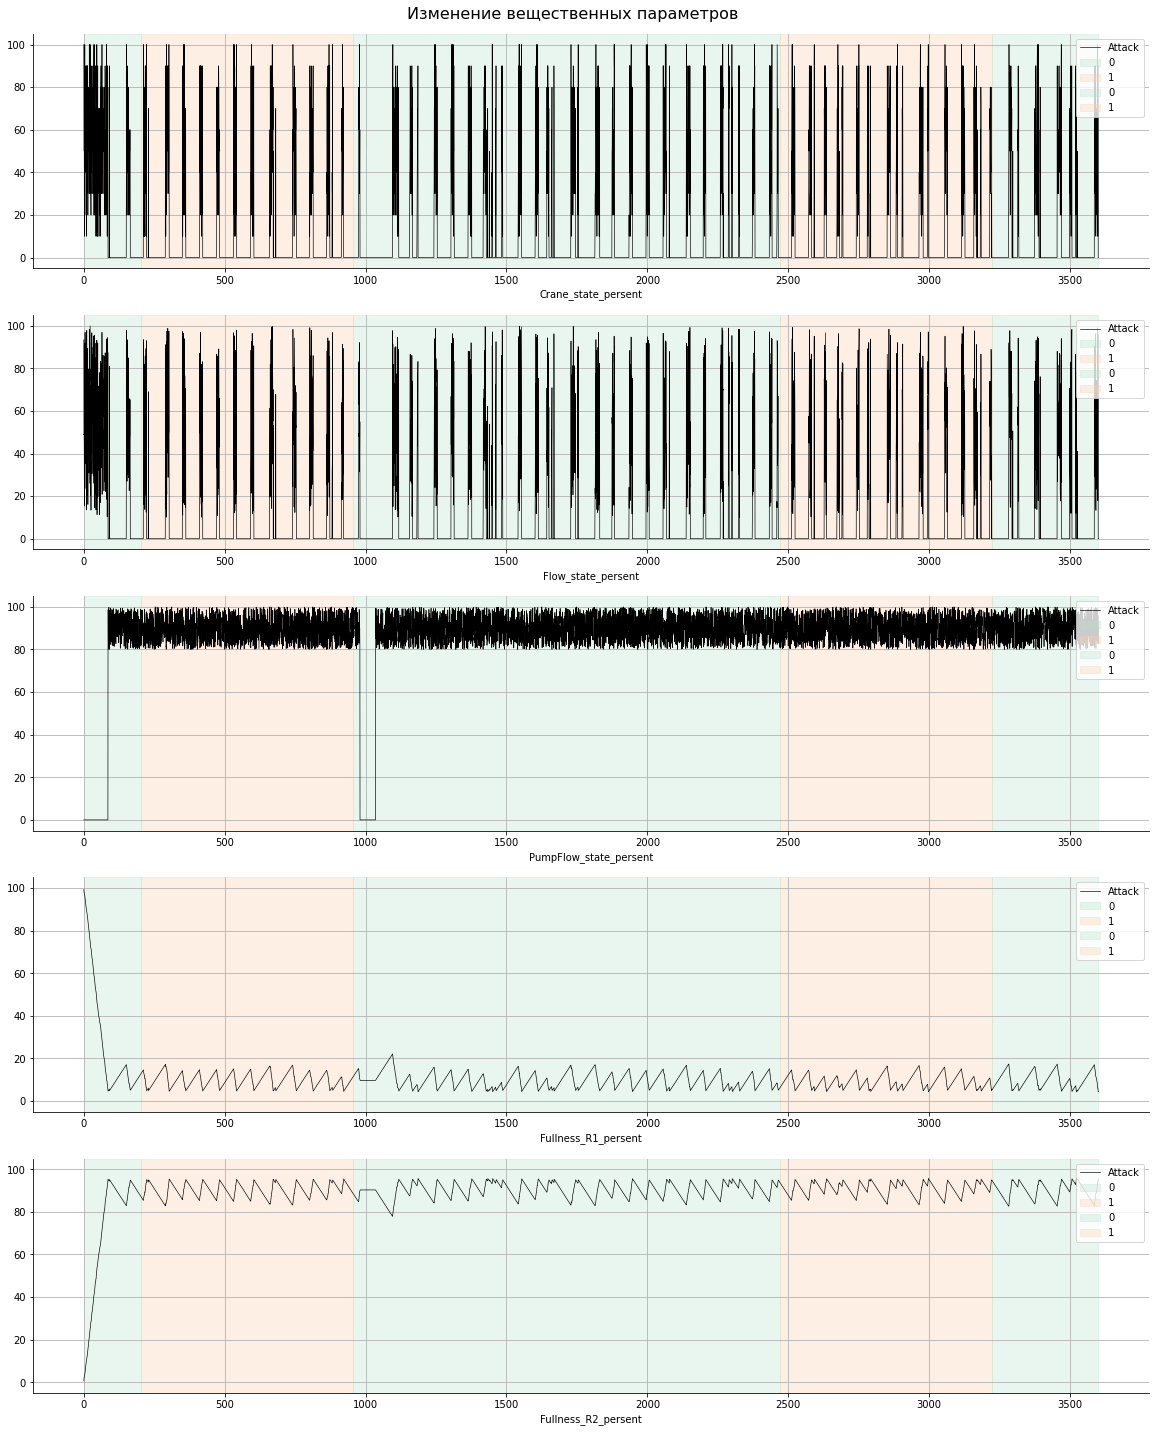

In [13]:
labels = ['Crane_state_persent', 'Flow_state_persent','PumpFlow_state_persent', 'Fullness_R1_persent', 'Fullness_R2_persent'] 

fig, ax = plt.subplots(nrows=5, ncols=1, sharey=True, figsize=(20, 25))

lineplot_for_atribute_set(df, df['Time_sec'], df['classAttack'], labels, ax)
fig.suptitle('Изменение вещественных параметров', fontsize=16, y=.895)
plt.show()

Строго говоря, визуально сложно заметить характерные изменения чиcловых параметров во время атаки. Однако 

1) хорошо заметен переходный период системы, когда она выходит на режим (обратите на первые 200 записей). В принципе, их можно исключить из дальнейшего анализа.


2) есть любопытное изменение параметров после первого периода с атакой, возможно это отсроченное изменение системы (для физических систем - это весьма характерное явление). 

Для подтверждения 1 и 2 пункта попробуйте изменить масштаб рисунков, отобразив только часть данных. 

## Анализ логических параметров

В датасете 7 булевых признаков, которые принимают значения либо 0, либо 1. 
Мы оценим распределение их значений для нормы и ненормы 

In [14]:
# определим функции для построения множества cтолючатых диаграмм с одинаковыми настройками

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

def bar_for_atribute_set(df1, df2, label, ax, y_scale='linear'):
  d = dict()
  d['Norm'] = []
  d['Attack'] = [] 

  attr_values = df[label].unique()
  x = np.arange(len(attr_values))  # the label locations
  width = .25  # the width of the bars
  multiplier = 0

  for attr_val in attr_values:
    attr_val_num_norm = df[df[label]==attr_val].shape[0]
    attr_val_num_ne_norm = df2[df2[label]==attr_val].shape[0]
    d['Norm'].append(attr_val_num_norm) 
    # print(f'Norm: {attr_val_num_norm}')
    d['Attack'].append(attr_val_num_ne_norm)
    # print(f'Not a norm: {attr_val_num_ne_norm}')

  for attr, val in d.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, val, width, label=str(attr))
    ax.bar_label(rects, padding=3)
    multiplier += 1
  
  ax.set_yscale(y_scale)
  ax.set_xticks(x + width/2, attr_values)
  
  ax.set_xlabel(label)
  # уберем лишние границы графика
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.grid()    
  ax.legend()

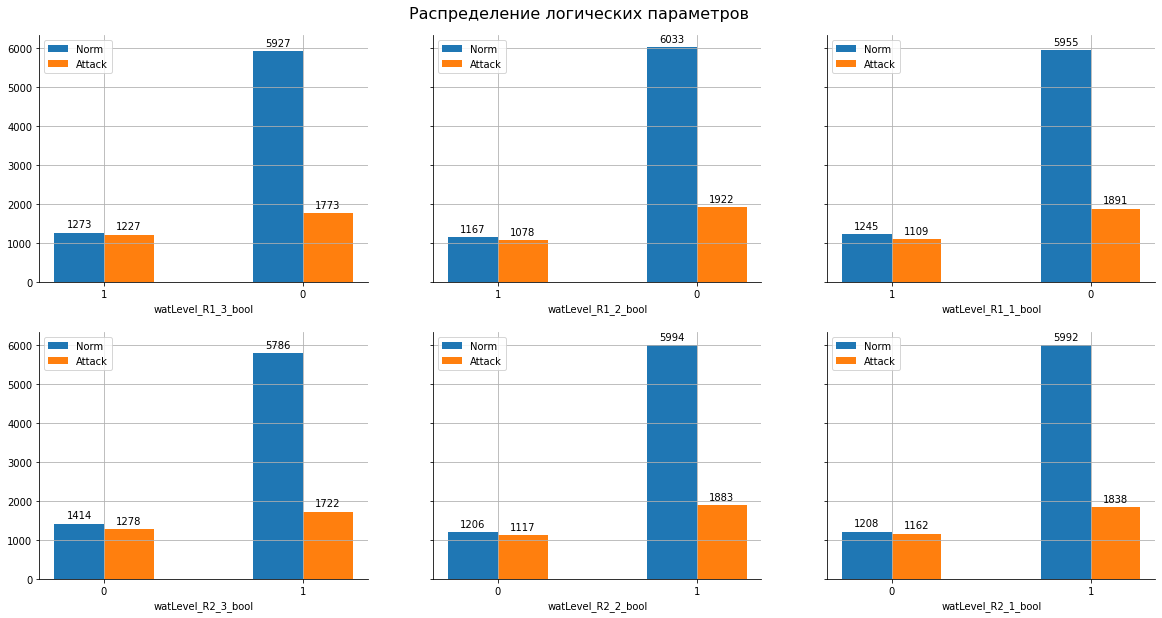

In [15]:
# поделили на 2 группы, чтобы лучше смотрелось

# print(f'matplotlib version: {matplotlib.__version__}')

labels1 = ['watLevel_R1_3_bool', 'watLevel_R1_2_bool', 'watLevel_R1_1_bool',
           'watLevel_R2_3_bool', 'watLevel_R2_2_bool', 'watLevel_R2_1_bool'] 

# boolean_labels3 = ['Pump_state_bool']

fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(20, 10))
fig.suptitle('Распределение логических параметров', fontsize=16, y=.92)

axes = ax.flatten()
for i, col in enumerate(labels1):
  bar_for_atribute_set(df_norm, df_anorm, col, axes[i], y_scale='linear')

Выводы: Если значение флага равно 0, то велика вероятность, что это норма (для параметров WaterLevel_R1_) , а вот если значение равно 0, то с равной вероятностью это может быть норма или атака, и обратное утверждение верно для группы параметров WaterLevel_R2_.

Обратите внимание, что подписи в первом и втором рядах упорядочены по-разному, как сильно затрудняет анализ. 


ДАвайте посмотреть, как изменяются эти параметры во времени, если какие-либо характерные изменения в них для обнаружения атаки.



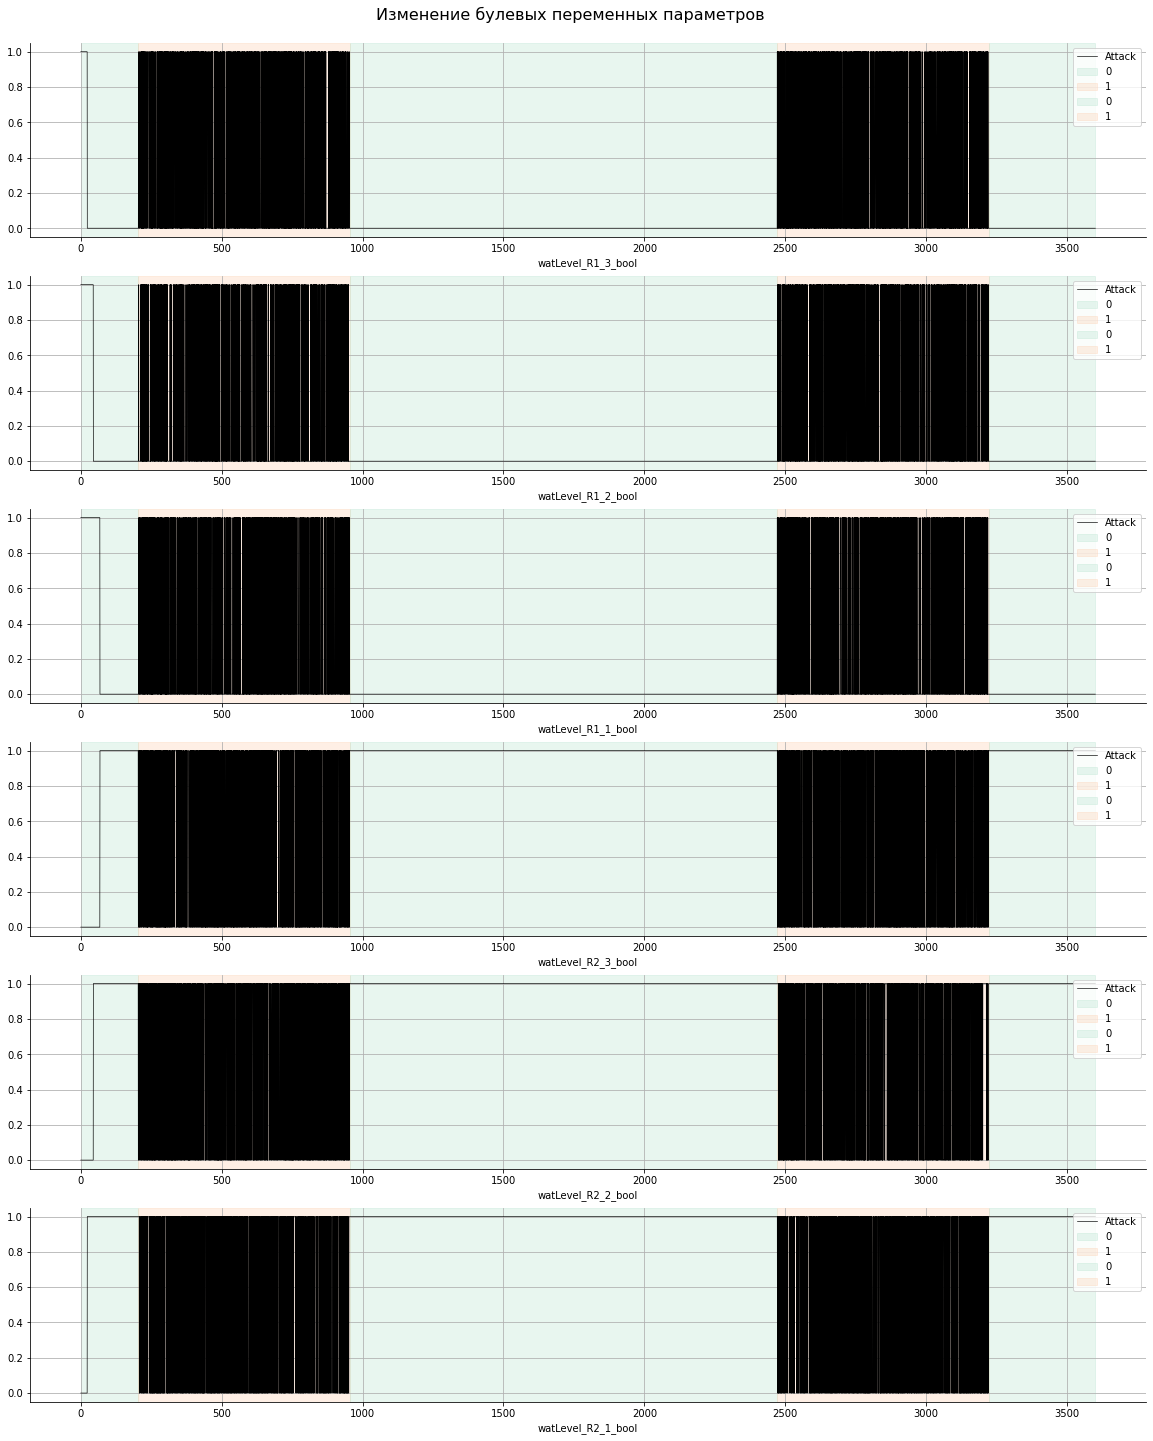

In [16]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharey=True, figsize=(20, 25))

lineplot_for_atribute_set(df, df['Time_sec'], df['classAttack'], labels1, ax)
plt.suptitle('Изменение булевых переменных параметров', fontsize=16, y=.9)
plt.show()

Ну что ж, мы получили достаточно характерные картинки. Во-первых, сразу видно, что параметры watLevel_R1 b watLevel_R2 изменяются в 'противофазе'. А для периодов с атакой характерно частое постоянное изменение значений с 1 на 0 и обратно. Таким образом, именно эти параметры могут служить для выявления данной аномалии, кроме того, следует оценивать не их значение, а частоту изменений их значений.

## Двумерный анализ переменных

Для начала построим матрицу корреляции. И сначала достаточно бездумно построим матрицу для всех параметров. Хотя очевидно, что скорее всего надо исключить такие параметры как id_record_inc, time sec (они лишь покажут как меняются значения во времени), можно оставить только один параметр classAttack.

Но, построив матрицу для всех переменных, можно увидеть, что уже для 12 параметров ее анализироваьть достаточно сложно, просто потому что она достаточно мелкая, поэтому лучше анализировать ее 'частями', выбрав наиболее 'интересные' пары. В данном случае, это могут быть пары переменных, связанные с булевскими переменными. Также это могут быть пары признаков, связанные по смыслу, а также пары наиболее 'значимых' переменных (выбранных, например, с помощью деревьев решений).
Кстати, цветом в данном случае кодируется признак $classAttack$.

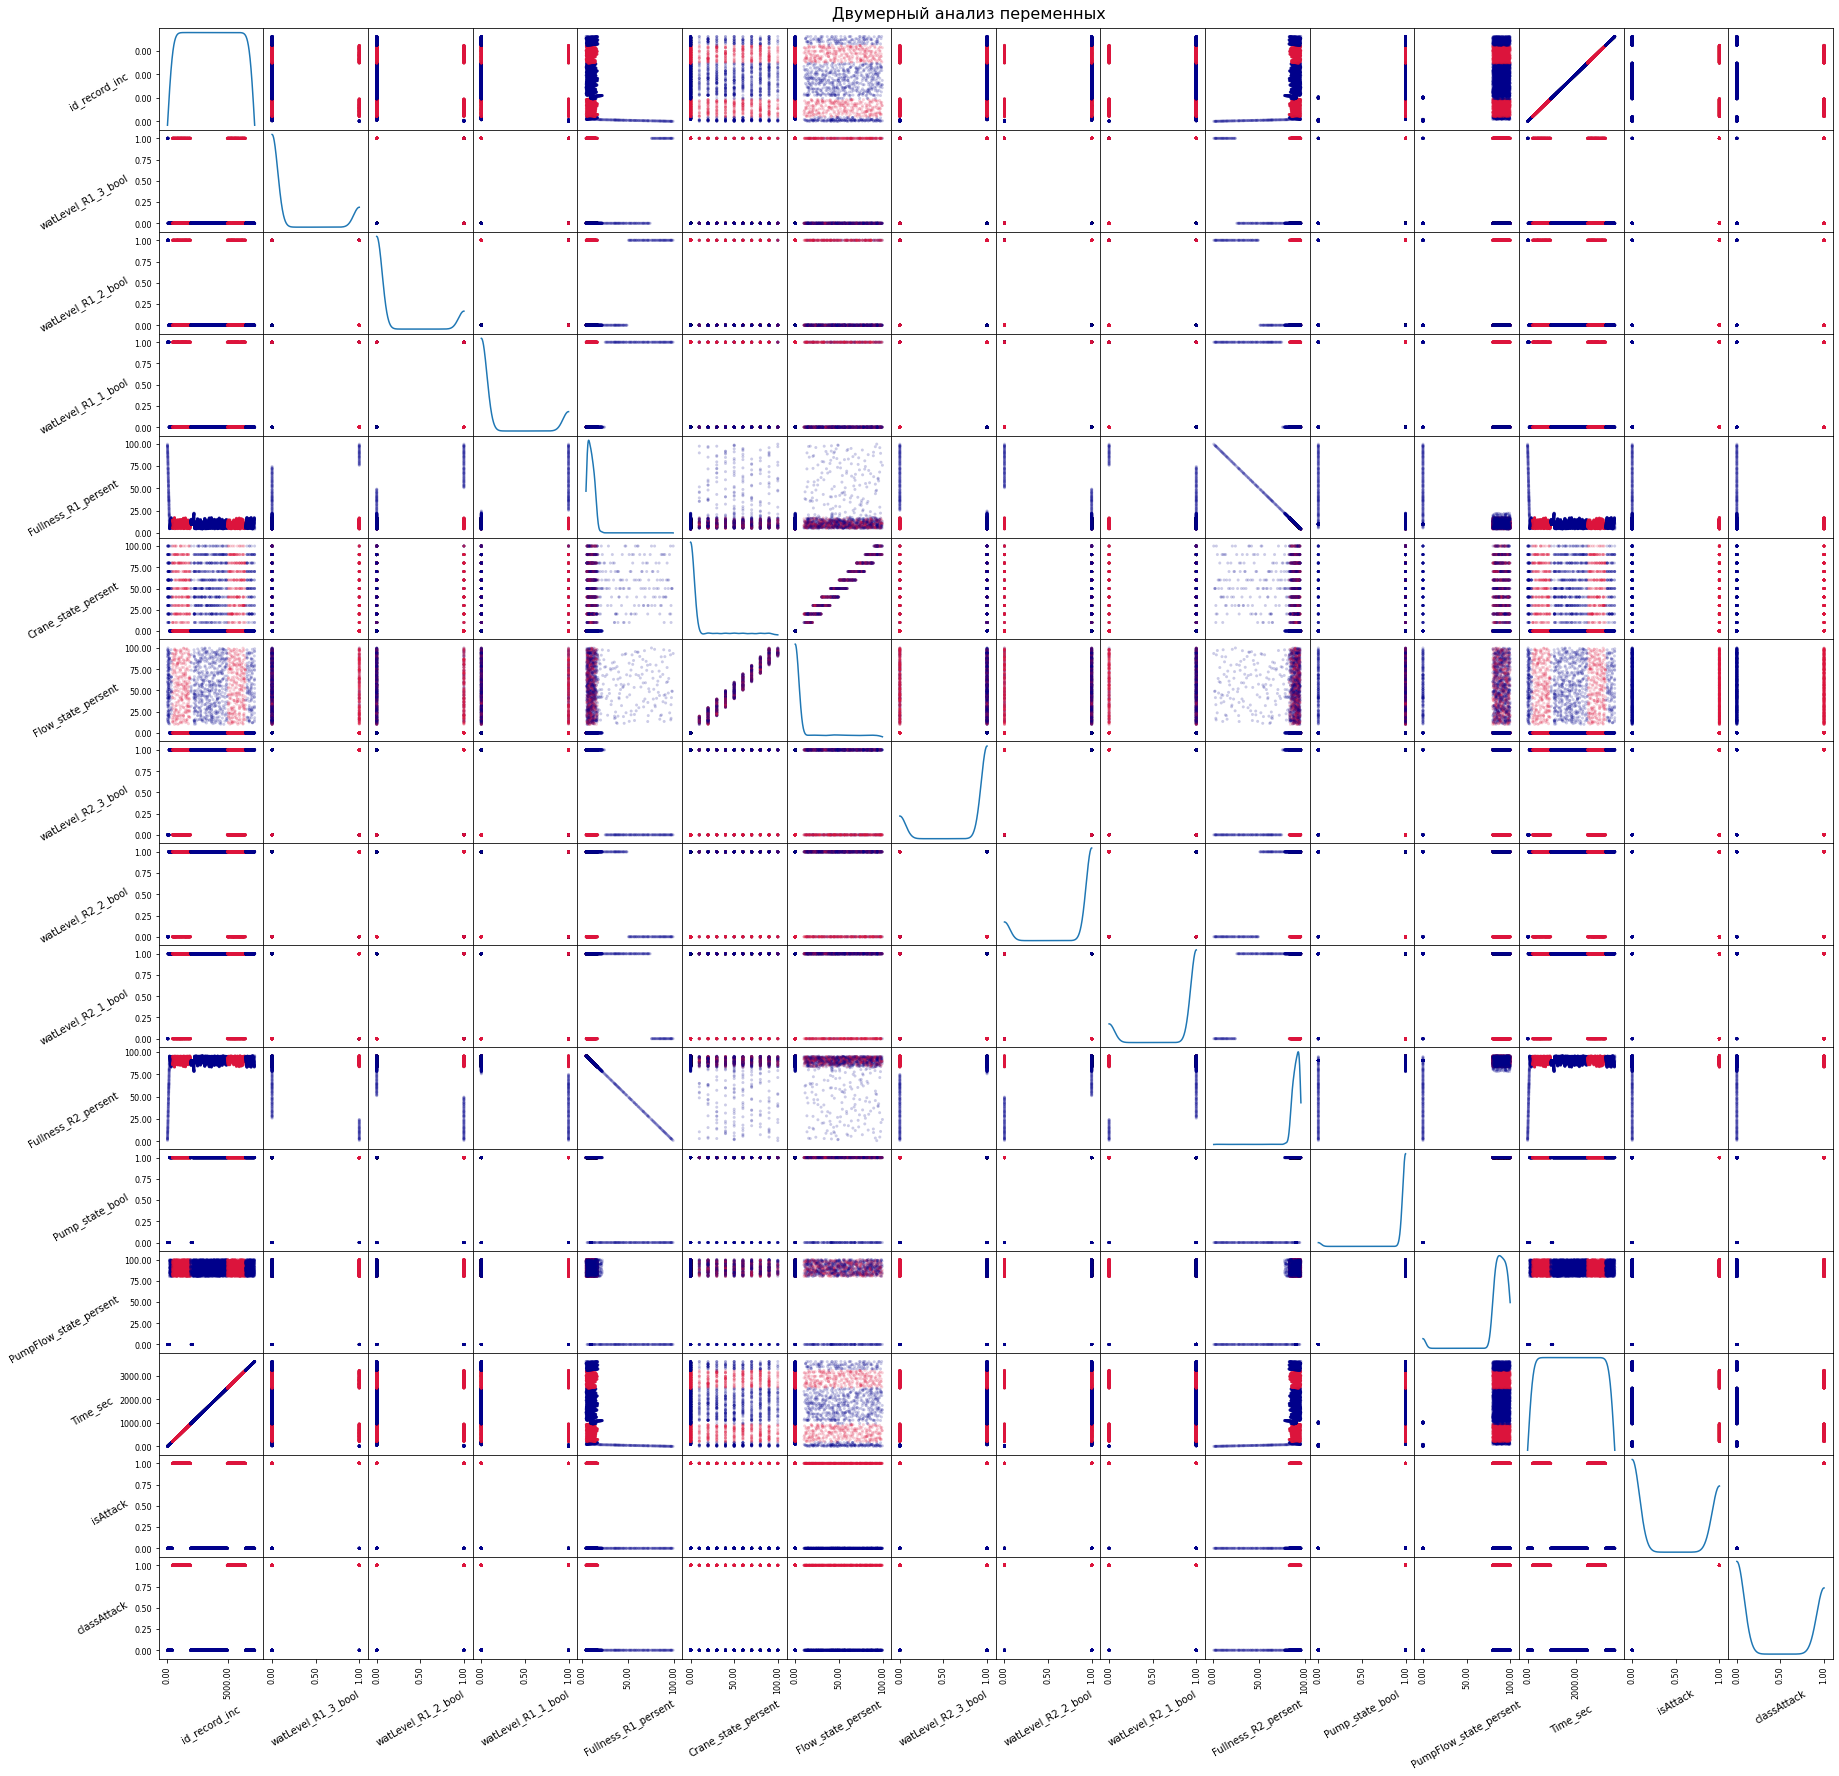

In [17]:
colors = ['#DC143C' if x else '#00008B' for x in df['classAttack']] 

# scatter_matrix(df, alpha=.2, figsize=(30, 30), diagonal='kde'])
axes = scatter_matrix(df, alpha=.2, figsize=(30, 30), range_padding=.2, diagonal='kde', color=colors)
plt.suptitle('Двумерный анализ переменных', fontsize=16, y=.89)

for ax in axes.flatten():
  ax.xaxis.label.set_rotation(30)
  ax.yaxis.label.set_rotation(30)
  ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
  ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
  ax.yaxis.label.set_ha('right')

Построим отдельно некоторые 'интересные' пары признаков. Цвет, как и в прошлый раз кодирует признак classAttack. 

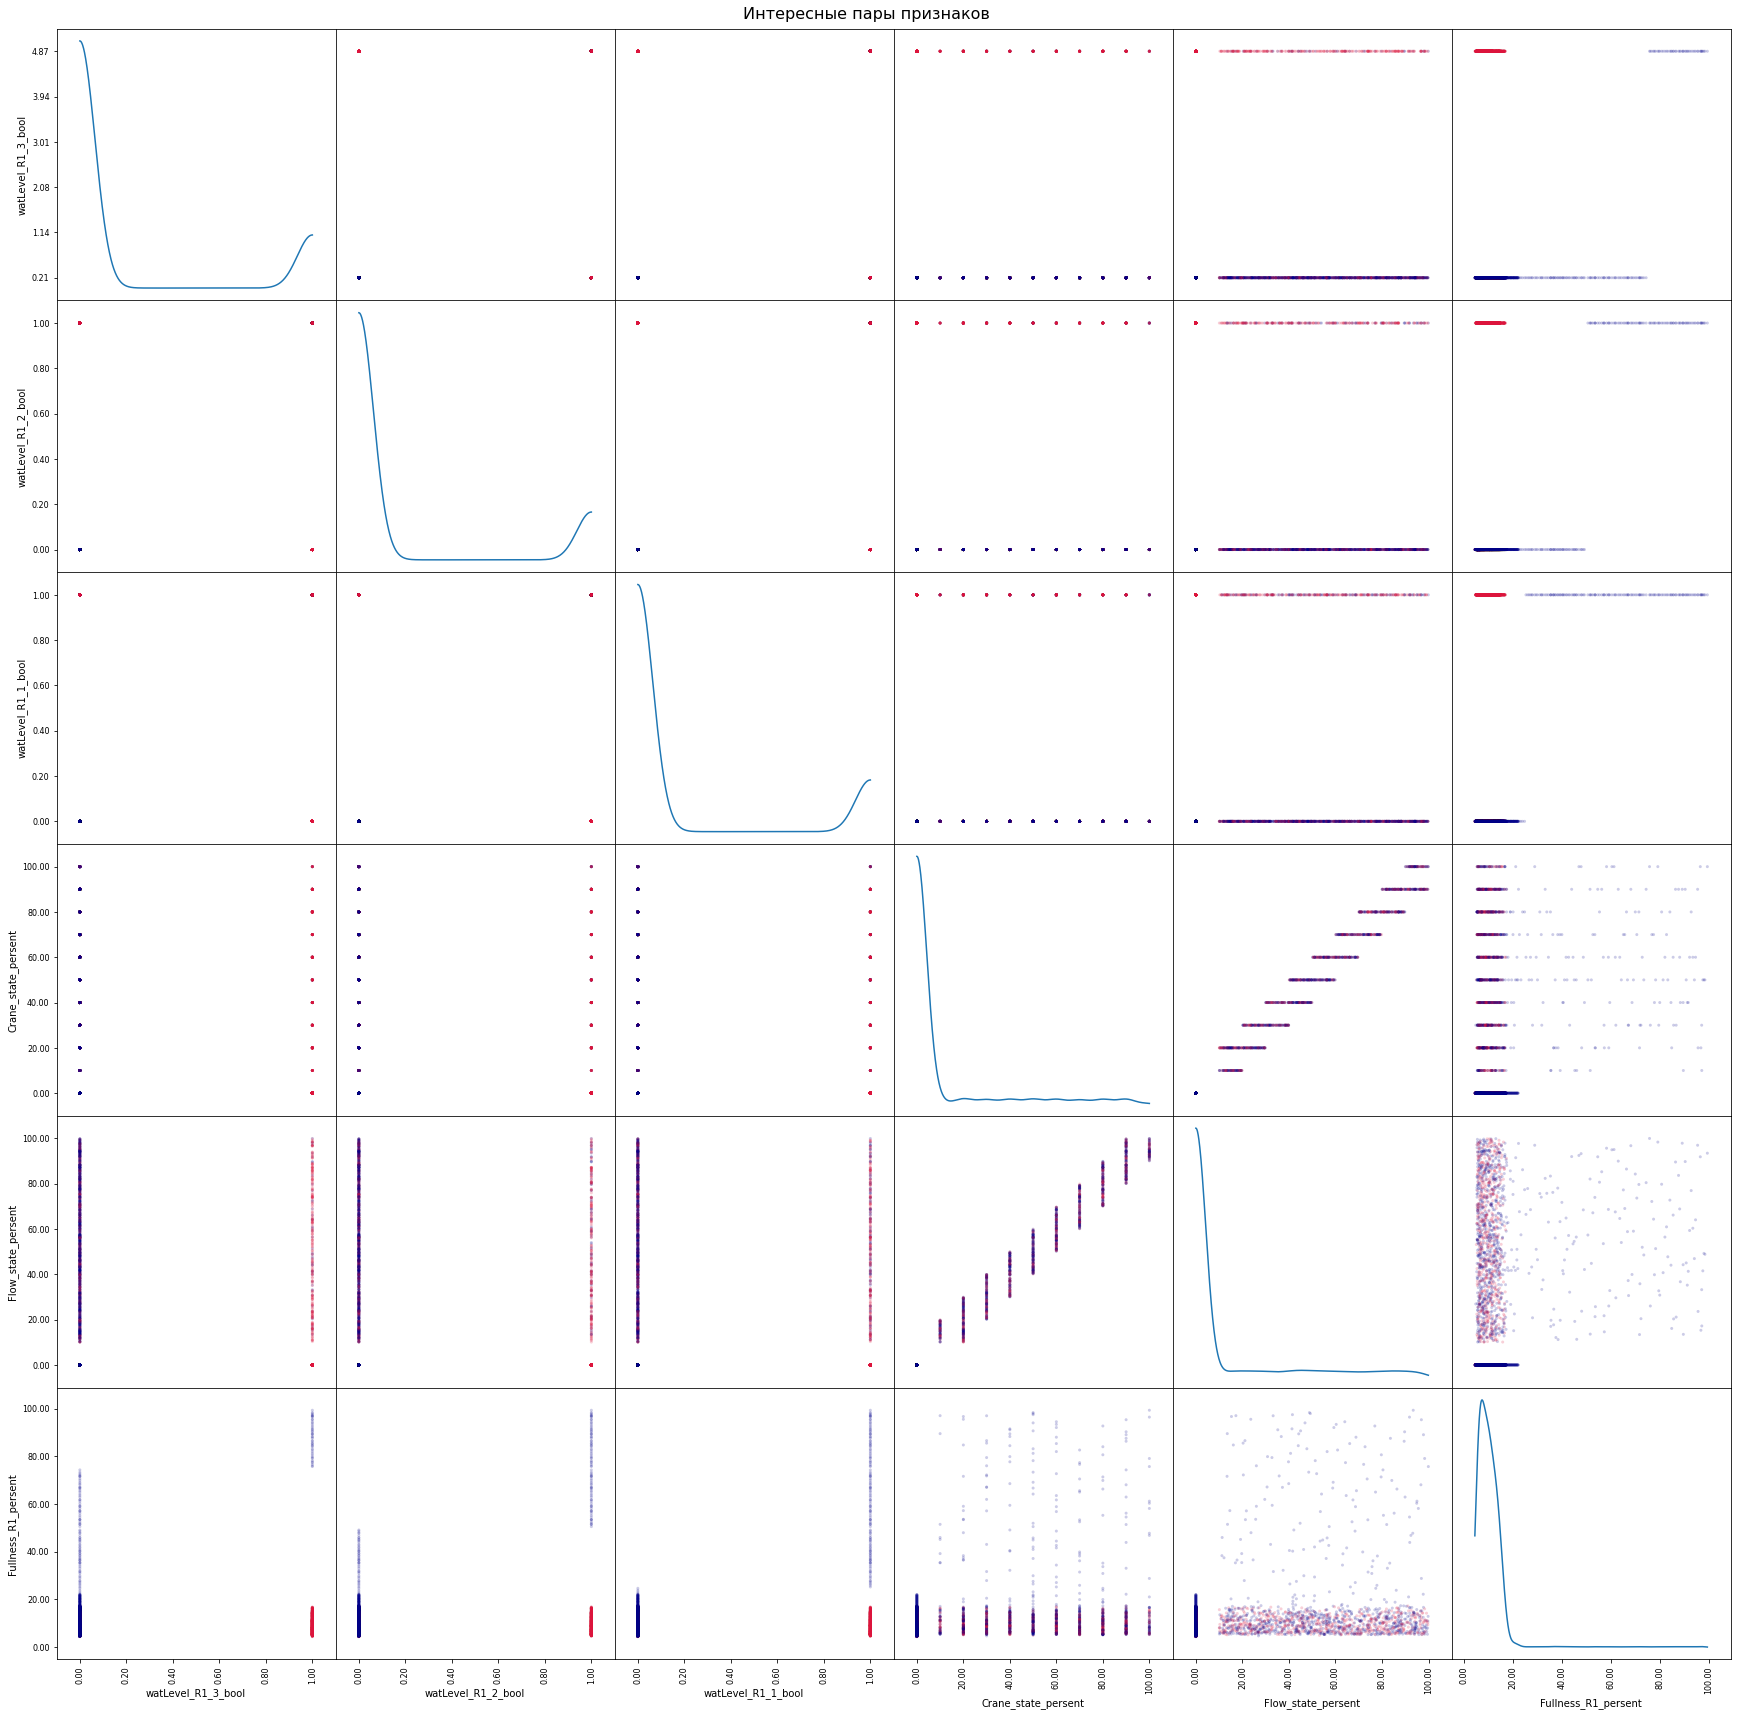

In [18]:
new_df = df[['watLevel_R1_3_bool', 'watLevel_R1_2_bool', 'watLevel_R1_1_bool', 
             'Crane_state_persent', 'Flow_state_persent', 'Fullness_R1_persent']]
colors = ['#DC143C' if x else '#00008B' for x in df['classAttack']] 

axes = scatter_matrix(new_df, alpha=.2, figsize=(30, 30), range_padding=.2, diagonal='kde', color=colors)
plt.suptitle('Интересные пары признаков', fontsize=16, y=.89)

for ax in axes.flatten():
  ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
  ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

Наши предположения подтвердились, что выявлять данную аномалию следует именно по булевым признакам. 


В заключение построим корреляционную матрицу. В этот раз выберем все параметры, и удалим ненужные.

---



In [19]:
# матрица корреляции намного симпатичнее выглядит в seaborn
def heatmap(df, ax, title):
  corr = df.corr()

  # пропустим пары со слабой корреляцией, попробуем поэкспериментировать с этой настройкой
  df_corr = corr[(corr>=.4) | (corr<=-.4)]

  # print(f'Empty columns: {get_empty_columns_names(df_corr)}')

  mask = np.triu(np.ones_like(corr))
  sns.heatmap(
    df_corr, 
    cbar=False, 
    mask=mask,
    ax=ax, 
    annot=True, 
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
  )

  ax.title.set_text(title)
  ax.tick_params(
    top=False,
    bottom=False,
    left=False,
    right=False,
  )

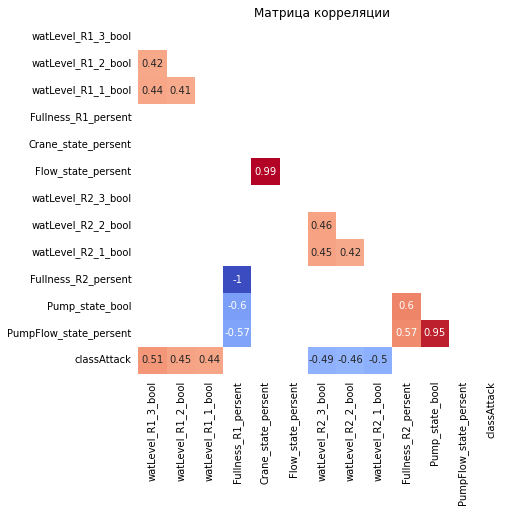

In [20]:
corr_labels = ['watLevel_R1_3_bool', 'watLevel_R1_2_bool', 'watLevel_R1_1_bool', 
               'Fullness_R1_persent', 'Crane_state_persent', 'Flow_state_persent',
               'watLevel_R2_3_bool', 'watLevel_R2_2_bool', 'watLevel_R2_1_bool', 
               'Fullness_R2_persent', 'Pump_state_bool', 'PumpFlow_state_persent', 
               'classAttack']

fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
hm = heatmap(df[corr_labels], ax, 'Матрица корреляции')

## Многомерный анализ признаков

В заключение, построим многомерную проекцию данных. Для этого применим преобразование PCA и посмотрим, даст ли нам что-то оно - например, сможем ли мы оценить хорошо ли разделимы данные с нормой и ненормой.

In [22]:
#corr_labels = ['watLevel_R1_3_bool', 'watLevel_R1_2_bool', 'watLevel_R1_1_bool', 
#               'Fullness_R1_persent', 'Crane_state_persent', 'Flow_state_persent',
#               'watLevel_R2_3_bool', 'watLevel_R2_2_bool', 'watLevel_R2_1_bool', 
#               'Fullness_R2_persent', 'Pump_state_bool', 'PumpFlow_state_persent', 
#               'classAttack']


x = df[corr_labels].values

# нормализуем значения
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print(f'Explained variance: {pca.explained_variance_ratio_}\tSum: {pca.explained_variance_ratio_.sum()}')

Explained variance: [0.28894906 0.21836328 0.13659436]	Sum: 0.6439067008558825


Обычно explained variance должна быть выше .95  или .99. В нашем случае, этот параметр невысокий (0.64), что говорит, что построенная проекция не самым лучшим образом отражает разброс данных. 

Тем не менее, давайте построим двухмерные и трехмерные проекции датасета.

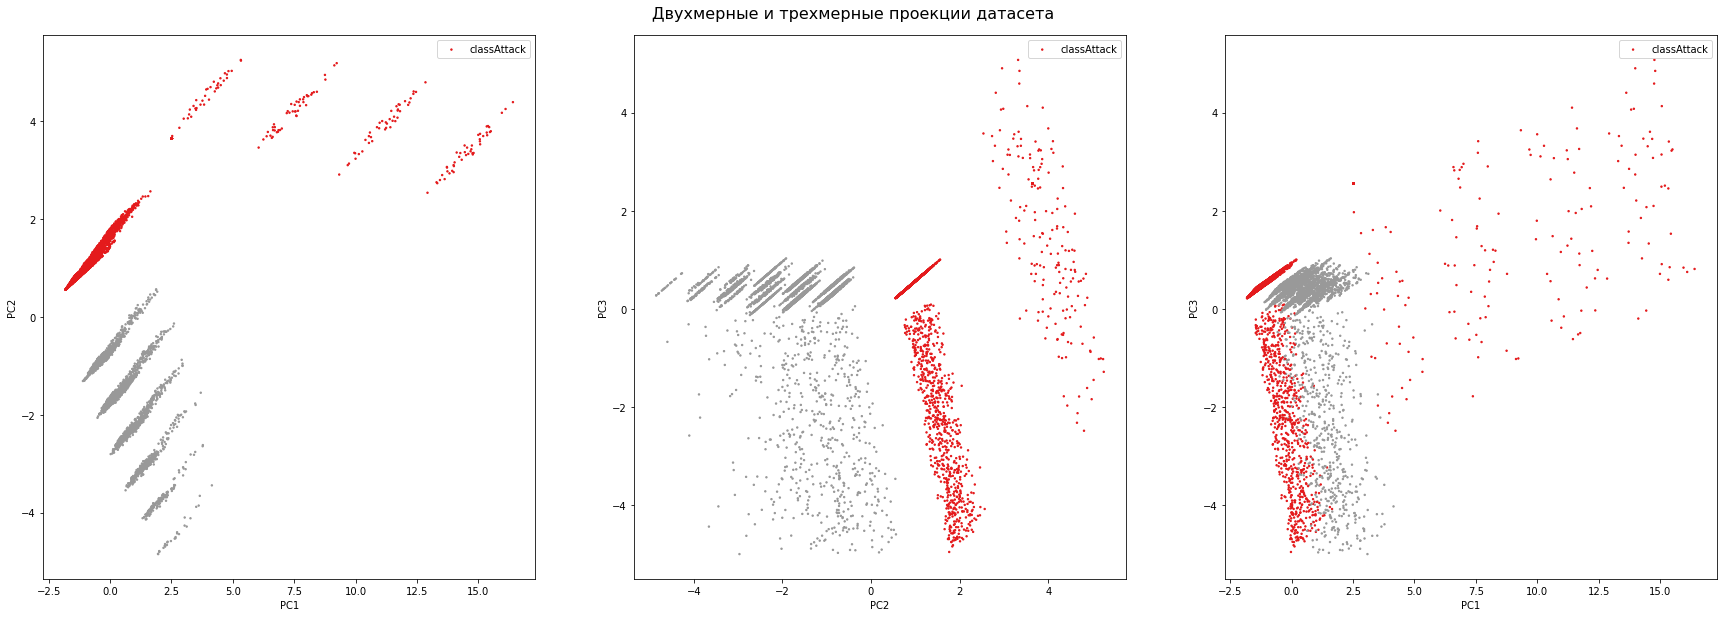

In [23]:
principalDf = pd.DataFrame(data=principalComponents , columns=['PC1', 'PC2', 'PC3'])

fig, ax_grid = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.suptitle('Двухмерные и трехмерные проекции датасета', fontsize=16, y=.92)

ax_grid[0].scatter(principalDf['PC1'], principalDf['PC2'], c=df['classAttack'], cmap='Set1', s=2, label='classAttack')
ax_grid[0].set_xlabel('PC1')
ax_grid[0].set_ylabel('PC2')
ax_grid[0].legend()

ax_grid[1].scatter(principalDf['PC2'], principalDf['PC3'], c=df['classAttack'], cmap='Set1', s=2, label='classAttack')
ax_grid[1].set_xlabel('PC2')
ax_grid[1].set_ylabel('PC3')
ax_grid[1].legend()

ax_grid[2].scatter(principalDf['PC1'], principalDf['PC3'], c=df['classAttack'], cmap='Set1', s=2, label='classAttack')
ax_grid[2].set_xlabel('PC1')
ax_grid[2].set_ylabel('PC3')
ax_grid[2].legend()

# plt.colorbar()
plt.show()